In [111]:
#ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [112]:
#データと取り込み
df = pd.read_csv('electronic_weather_data.csv',engine='python')
df.columns = ['年月日','平均気温','日照時間','降水量','平均蒸気圧','平均湿度','平均雲量','最高気温','最低気温','平均風速','電力使用量']
#説明変数を取得
tmpX = df.iloc[:,1:-1]
y = df.iloc[:,-1]

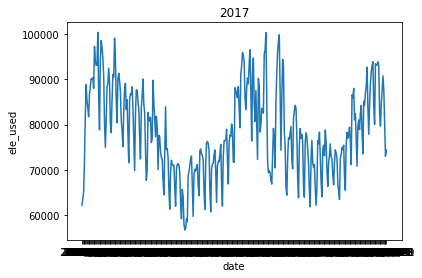

In [113]:
#読み込んだ電力データの表示
pyplot.plot(df.iloc[:,0],df.iloc[:,-1],label='2017')
pyplot.title('2017')
pyplot.xlabel('date')
pyplot.ylabel('ele_used')
pyplot.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


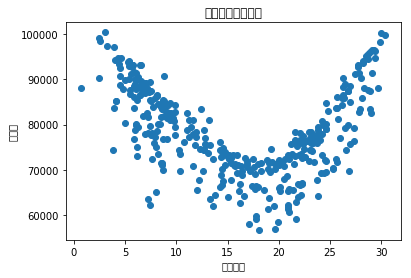

In [16]:
#電力データと説明変数を散布図で評価
#平均気温
a = df.iloc[:,1]
b = df.iloc[:,-1]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(a,b)
ax.set_title('平均気温と電力量')
ax.set_xlabel('平均気温')
ax.set_ylabel('電力量')
fig.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


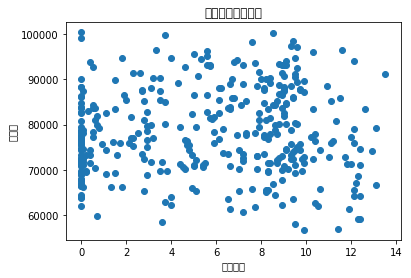

In [17]:
#日照時間
a = df.iloc[:,2]
b = df.iloc[:,-1]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(a,b)
ax.set_title('日照時間と電力量')
ax.set_xlabel('日照時間')
ax.set_ylabel('電力量')
fig.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


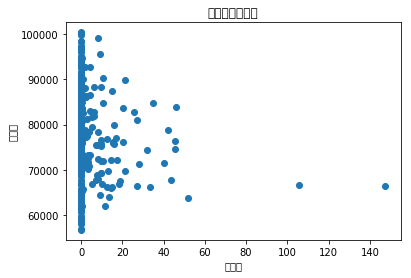

In [18]:
#降水量
a = df.iloc[:,3]
b = df.iloc[:,-1]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(a,b)
ax.set_title('降水量と電力量')
ax.set_xlabel('降水量')
ax.set_ylabel('電力量')
fig.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


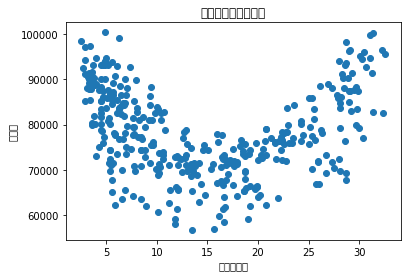

In [19]:
#平均蒸気圧
a = df.iloc[:,4]
b = df.iloc[:,-1]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(a,b)
ax.set_title('平均蒸気圧と電力量')
ax.set_xlabel('平均蒸気圧')
ax.set_ylabel('電力量')
fig.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


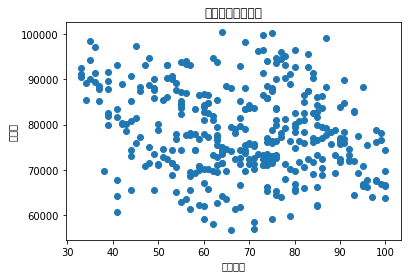

In [20]:
#平均湿度
a = df.iloc[:,5]
b = df.iloc[:,-1]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(a,b)
ax.set_title('平均湿度と電力量')
ax.set_xlabel('平均湿度')
ax.set_ylabel('電力量')
fig.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


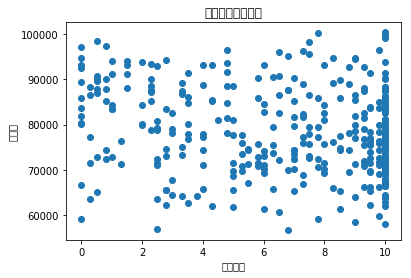

In [21]:
#平均雲量
a = df.iloc[:,6]
b = df.iloc[:,-1]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(a,b)
ax.set_title('平均雲量と電力量')
ax.set_xlabel('平均雲量')
ax.set_ylabel('電力量')
fig.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


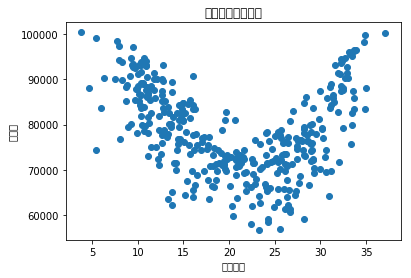

In [22]:
#最高気温
a = df.iloc[:,7]
b = df.iloc[:,-1]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(a,b)
ax.set_title('最高気温と電力量')
ax.set_xlabel('最高気温')
ax.set_ylabel('電力量')
fig.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


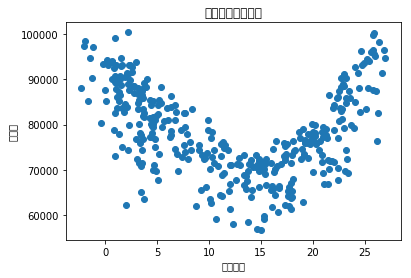

In [23]:
#最低気温
a = df.iloc[:,8]
b = df.iloc[:,-1]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(a,b)
ax.set_title('最低気温と電力量')
ax.set_xlabel('最低気温')
ax.set_ylabel('電力量')
fig.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


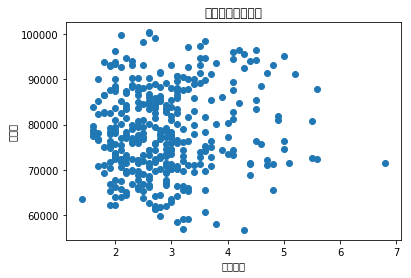

In [24]:
#平均風速
a = df.iloc[:,9]
b = df.iloc[:,-1]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(a,b)
ax.set_title('平均風速と電力量')
ax.set_xlabel('平均風速')
ax.set_ylabel('電力量')
fig.show()

In [117]:
#すべて数値データのため標準化を行う
sc = StandardScaler()
sc.fit(tmpX)
X = pd.DataFrame(sc.transform(tmpX))

#学習用データとテストデータに分割
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.5)

In [118]:
#正則化なしの線形回帰
#モデル作成
reg_lr = LinearRegression()
reg_lr.fit(X_train,y_train)
reg_lr.coef_
train_pred = reg_lr.predict(X_train)
train_mse = mean_squared_error(y_true=y_train , y_pred=train_pred)
#RMSEを出力
print(np.sqrt(train_mse))

9148.73454019325


In [119]:
#テストデータで予測を実施
test_pred = reg_lr.predict(X_test)
test_mse = mean_squared_error(y_true=y_test , y_pred=test_pred)
#RMSEを出力
print(np.sqrt(test_mse))
test_pred

9476.799621213837


array([76611.50033551, 77050.25227829, 79472.16300246, 79191.36175907,
       76699.25072407, 77155.55274456, 79946.01510066, 78155.90717411,
       75628.69598368, 79401.96269161, 76944.95181203, 80103.96580006,
       75909.49722706, 78717.50966087, 78910.56051569, 77173.10282227,
       78770.159894  , 76944.95181203, 76593.9502578 , 77383.70375481,
       77173.10282227, 79875.81478982, 79963.56517837, 76646.60049093,
       75611.14590597, 76225.39862586, 77734.70530903, 77225.75305541,
       80086.41572235, 77524.1043765 , 76769.45103491, 77067.802356  ,
       75225.04419632, 79595.01354643, 77366.1536771 , 78612.2091946 ,
       79858.2647121 , 79191.36175907, 76734.35087949, 80016.21541151,
       80279.46657718, 78998.31090425, 78331.40795122, 79998.6653338 ,
       78366.50810664, 79823.16455668, 79928.46502295, 79665.21385728,
       78173.45725182, 79717.86409041, 79805.61447897, 76032.34777104,
       77085.35243372, 77050.25227829, 77541.65445421, 75821.7468385 ,
      

In [125]:
df_2018 = pd.read_csv('data - data (1).csv',engine='python')
df_2018.columns = ['年月日','平均気温','日照時間','降水量','平均蒸気圧','平均湿度','平均雲量','最高気温','最低気温','平均風速','電力使用量']
#説明変数を取得
tmpX_2018 = df_2018.iloc[:,1:-1]
y_2018 = df_2018.iloc[:,-1]

#すべて数値データのため標準化を行う
sc = StandardScaler()
sc.fit(tmpX_2018)
X_2018 = pd.DataFrame(sc.transform(tmpX_2018))


In [126]:
pred2018 = reg_lr.predict(X_2018)

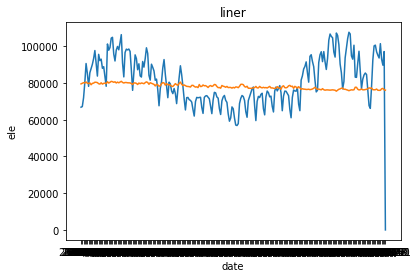

In [127]:
#予測結果と実際の結果をグラフに表示
pred2018 = reg_lr.predict(X_2018)
pyplot.plot(df_2018.iloc[:,0],y_2018,label='2017')
pyplot.plot(df_2018.iloc[:,0],pred2018,label='2018')
pyplot.title('liner')
pyplot.xlabel('date')
pyplot.ylabel('ele')
pyplot.show()

In [81]:
#Lasso回帰
#モデル作成
reg_l1 = Lasso(alpha=100)
reg_l1.fit(X_train,y_train)
reg_l1.coef_
train_predtrain_pre  = reg_l1.predict(X_train)
train_mse = mean_squared_error(y_true=y_train , y_pred=train_pred)
#RMSEを出力
print(np.sqrt(train_mse))

6370.89027298453


In [82]:
#テストデータで予測を実施
test_pred = reg_l1.predict(X_test)
test_mse = mean_squared_error(y_true=y_test , y_pred=test_pred)
#RMSEを出力
print(np.sqrt(test_mse))

6395.627747281912


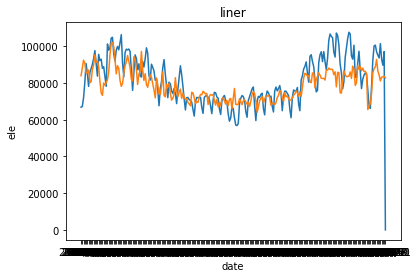

In [83]:
#予測結果と実際の結果をグラフに表示
pred2018 = reg_lr.predict(X_2018)
pyplot.plot(df_2018.iloc[:,0],y_2018,label='2017')
pyplot.plot(df_2018.iloc[:,0],pred2018,label='2018')
pyplot.title('liner')
pyplot.xlabel('date')
pyplot.ylabel('ele')
pyplot.show()

In [84]:
#Rigde回帰
#モデル作成
reg_l2 = Ridge(alpha=100)
reg_l2.fit(X_train,y_train)
reg_l2.coef_
train_pred = reg_l2.predict(X_train)
train_mse = mean_squared_error(y_true=y_train , y_pred=train_pred)
#RMSEを出力
print(np.sqrt(train_mse))

8995.7471526329


In [85]:
#テストデータで予測を実施
test_pred = reg_l2.predict(X_test)
test_mse = mean_squared_error(y_true=y_test , y_pred=test_pred)
#RMSEを出力
print(np.sqrt(test_mse))

8608.91260905845


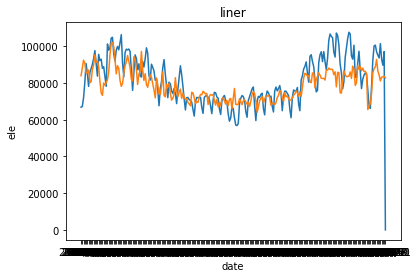

In [86]:
#予測結果と実際の結果をグラフに表示
pred2018 = reg_lr.predict(X_2018)
pyplot.plot(df_2018.iloc[:,0],y_2018,label='2017')
pyplot.plot(df_2018.iloc[:,0],pred2018,label='2018')
pyplot.title('liner')
pyplot.xlabel('date')
pyplot.ylabel('ele')
pyplot.show()

In [105]:
#ランダムフォレスト
#モデル作成
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)
regr.fit(X_train,y_train)
#regr.coef_
train_pred = regr.predict(X_train)
train_mse = mean_squared_error(y_true=y_train , y_pred=train_pred)
#RMSEを出力
print(np.sqrt(train_mse))

2506.5433689444712


In [106]:
#テストデータで予測を実施
test_pred = regr.predict(X_test)
test_mse = mean_squared_error(y_true=y_test , y_pred=test_pred)
#RMSEを出力
print(np.sqrt(test_mse))

5456.603789559172


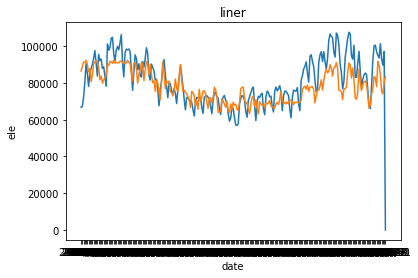

In [107]:
#予測結果と実際の結果をグラフに表示
pred2018 = regr.predict(X_2018)
pyplot.plot(df_2018.iloc[:,0],y_2018,label='2017')
pyplot.plot(df_2018.iloc[:,0],pred2018,label='2018')
pyplot.title('liner')
pyplot.xlabel('date')
pyplot.ylabel('ele')
pyplot.show()

In [103]:
parameters = {
        'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
        'max_features'      : [1,2,3,4,5,6,7,8,9],
        'random_state'      : [0],
        'n_jobs'            : [1],
        'min_samples_split' : [5],
        'max_depth'         : [10]
}
ref = GridSearchCV(RandomForestRegressor(), parameters)
ref.fit(X_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 20, 30, 50, 100, 300], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'random_state': [0], 'n_jobs': [1], 'min_samples_split': [5], 'max_depth': [10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
print(ref.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)
